In [10]:
setwd("D:/monografia/_dva/scripts/py/")
pacman::p_load(dplyr, psych, ggplot2, tidyr, DBI, RSQLite, lubridate)
options(sapien = 999)

db_path <- "D:/monografia/_dva/db/dva.db"
con <- dbConnect(RSQLite::SQLite(), dbname = db_path)
dados <- dbReadTable(con, "pib_bcb")
dados$DATA <- as.Date(dados$DATA, "%d/%m/%Y")
glimpse(dados)


Rows: 408
Columns: 4
$ ANO      <int> 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1…
$ DATA     <date> 1990-01-01, 1990-02-01, 1990-03-01, 1990-04-01, 1990-05-01, …
$ PIB      <dbl> 0.2, 0.4, 0.8, 0.7, 0.8, 0.8, 0.9, 1.0, 1.1, 1.4, 1.7, 1.8, 2…
$ PIB_REAL <dbl> 390914.0, 455398.4, 502314.6, 394795.0, 413674.1, 379447.9, 3…


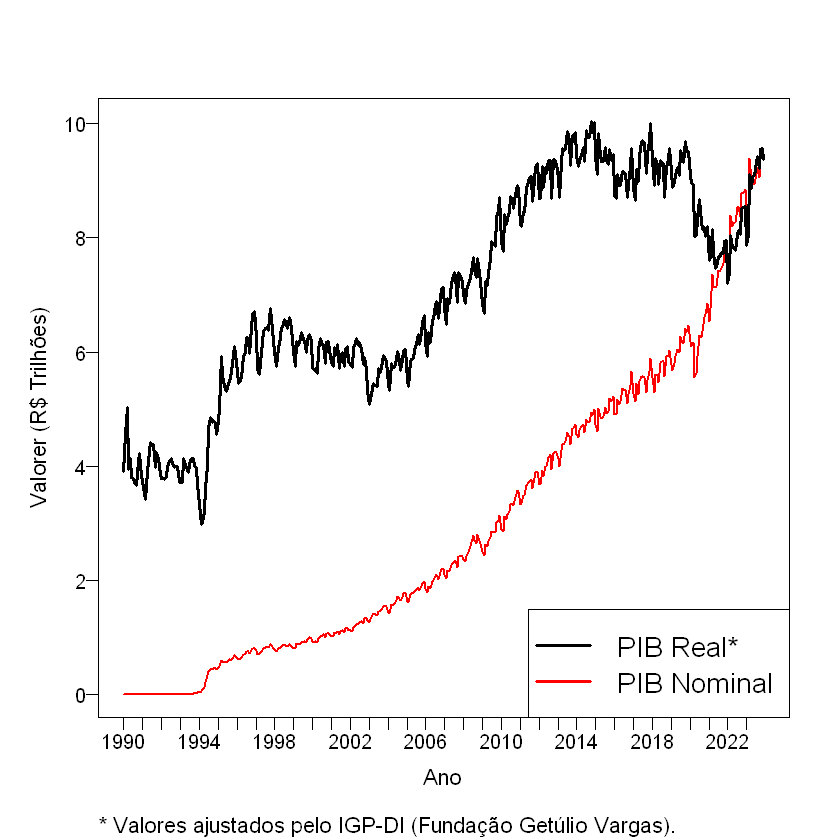

In [7]:
# Defina as variáveis para altura e largura do gráfico
largura <- 10  # largura em polegadas
altura <- 7  # altura em polegadas

# Ajuste os parâmetros gráficos para definir a altura e largura
par(mfrow = c(1, 1), mar = c(5, 5, 4, 2) + 0.1, oma = c(0, 0, 2, 0))

# Defina o tamanho do dispositivo gráfico
dev.new(width = largura, height = altura)

# Encontre o valor máximo entre as três colunas
max_y <- max(max(dados$PIB_REAL), max(dados$PIB))

par(mgp = c(2, 0.5, 0))  # Ajuste os valores conforme necessário

# Crie o gráfico vazio usando plot() com o primeiro conjunto de dados
plot(dados$DATA,
     dados$PIB,
     type = "n",  # Defina type = "n" para criar um gráfico vazio
     xlab = "Ano", ylab = "Valorer (R$ Trilhões)",
     ylim = c(0, max_y),  # Definir limite do eixo y
     yaxt = "n",   # Não mostrar o eixo Y automaticamente
     xaxt = "n",  # Não mostrar o eixo X automaticamente
     cex.lab = 1.1)

# Adicione as linhas com diferentes símbolos
lines(dados$DATA, dados$PIB,
      type = "l", col = "red", lwd = 2)
lines(dados$DATA, dados$PIB_REAL,
      type = "l", col = "black", lwd = 3)      

# Adicione uma legenda
legend("bottomright", 
       legend = c("PIB Real*", "PIB Nominal"), 
       col = c("black", "red"), 
       pch = c(NA, NA),  # Símbolos correspondentes
       lty = 1,
       lwd = 3,
       cex = 1.4,       # Tamanho da fonte
       xjust = 1,       # Ajusta a posição horizontal da legenda
       yjust = 0.5,     # Ajusta a posição vertical da legenda
       #inset = c(-0.2, 0) # Ajusta a posição da legenda em relação ao gráfico
)

# Obtenha anos únicos e suas posições correspondentes
unique_years <- unique(dados$ANO)
unique_positions <- dados$DATA[match(unique_years, dados$ANO)]

# Adicione os anos no eixo X, apenas os únicos
axis(1, at = unique_positions, labels = unique_years, las = 1, cex.axis = 1)

# Ajuste o formato do eixo Y para mostrar os valores divididos por 100
# e evite notação científica
y_ticks <- pretty(range(dados$PIB_REAL, dados$PIB))
y_labels <- format(y_ticks / 100000, scientific = FALSE)
axis(2, at = y_ticks, labels = y_labels, las = 1, cex.axis = 1)

# Adicione a nota explicativa abaixo do eixo X
mtext("* Valores ajustados pelo IGP-DI (Fundação Getúlio Vargas).",
      side = 1, line = 4, cex = 1.1, adj = 0, outer = FALSE)


In [5]:
# SALVAR O GRÁFICO
# Especifica o nome do arquivo e o tipo
png(filename = "grafico_pib.png", width = 800, height = 600)

# Repita o código do gráfico para salvá-lo no arquivo
max_y <- max(max(dados$PIB_REAL), max(dados$PIB))

par(mgp = c(2, 0.5, 0))  # Ajuste os valores conforme necessário

# Crie o gráfico vazio usando plot() com o primeiro conjunto de dados
plot(dados$DATA,
     dados$PIB,
     type = "n",  # Defina type = "n" para criar um gráfico vazio
     xlab = "Ano", ylab = "Valorer (R$ Trilhões)",
     ylim = c(0, max_y),  # Definir limite do eixo y
     yaxt = "n",   # Não mostrar o eixo Y automaticamente
     xaxt = "n",  # Não mostrar o eixo X automaticamente
     cex.lab = 1.1)

# Adicione as linhas com diferentes símbolos
lines(dados$DATA, dados$PIB,
      type = "l", col = "red", lwd = 2)
lines(dados$DATA, dados$PIB_REAL,
      type = "l", col = "black", lwd = 3)      

# Adicione uma legenda
legend("bottomright", 
       legend = c("PIB Real*", "PIB Nominal"), 
       col = c("black", "red"), 
       pch = c(NA, NA),  # Símbolos correspondentes
       lty = 1,
       lwd = 3,
       cex = 1.4,       # Tamanho da fonte
       xjust = 1,       # Ajusta a posição horizontal da legenda
       yjust = 0.5     # Ajusta a posição vertical da legenda
)

# Obtenha anos únicos e suas posições correspondentes
unique_years <- unique(dados$ANO)
unique_positions <- dados$DATA[match(unique_years, dados$ANO)]

# Adicione os anos no eixo X, apenas os únicos
axis(1, at = unique_positions, labels = unique_years, las = 1, cex.axis = 1)

# Ajuste o formato do eixo Y para mostrar os valores divididos por 100
# e evite notação científica
y_ticks <- pretty(range(dados$PIB_REAL, dados$PIB))
y_labels <- format(y_ticks / 100000, scientific = FALSE)
axis(2, at = y_ticks, labels = y_labels, las = 1, cex.axis = 1)

# Adicione a nota explicativa abaixo do eixo X
mtext("* Valores ajustados pelo IGP-DI (Fundação Getúlio Vargas).",
      side = 1, line = 4, cex = 1.1, adj = 0, outer = FALSE)

# Feche o dispositivo gráfico para salvar o arquivo
dev.off()

png 
  2